In [44]:
import numpy as np
import math as math

from graphtools import *
from vectools import * 

from scipy.linalg import expm
np.set_printoptions(linewidth=np.inf,precision=3, suppress=True)


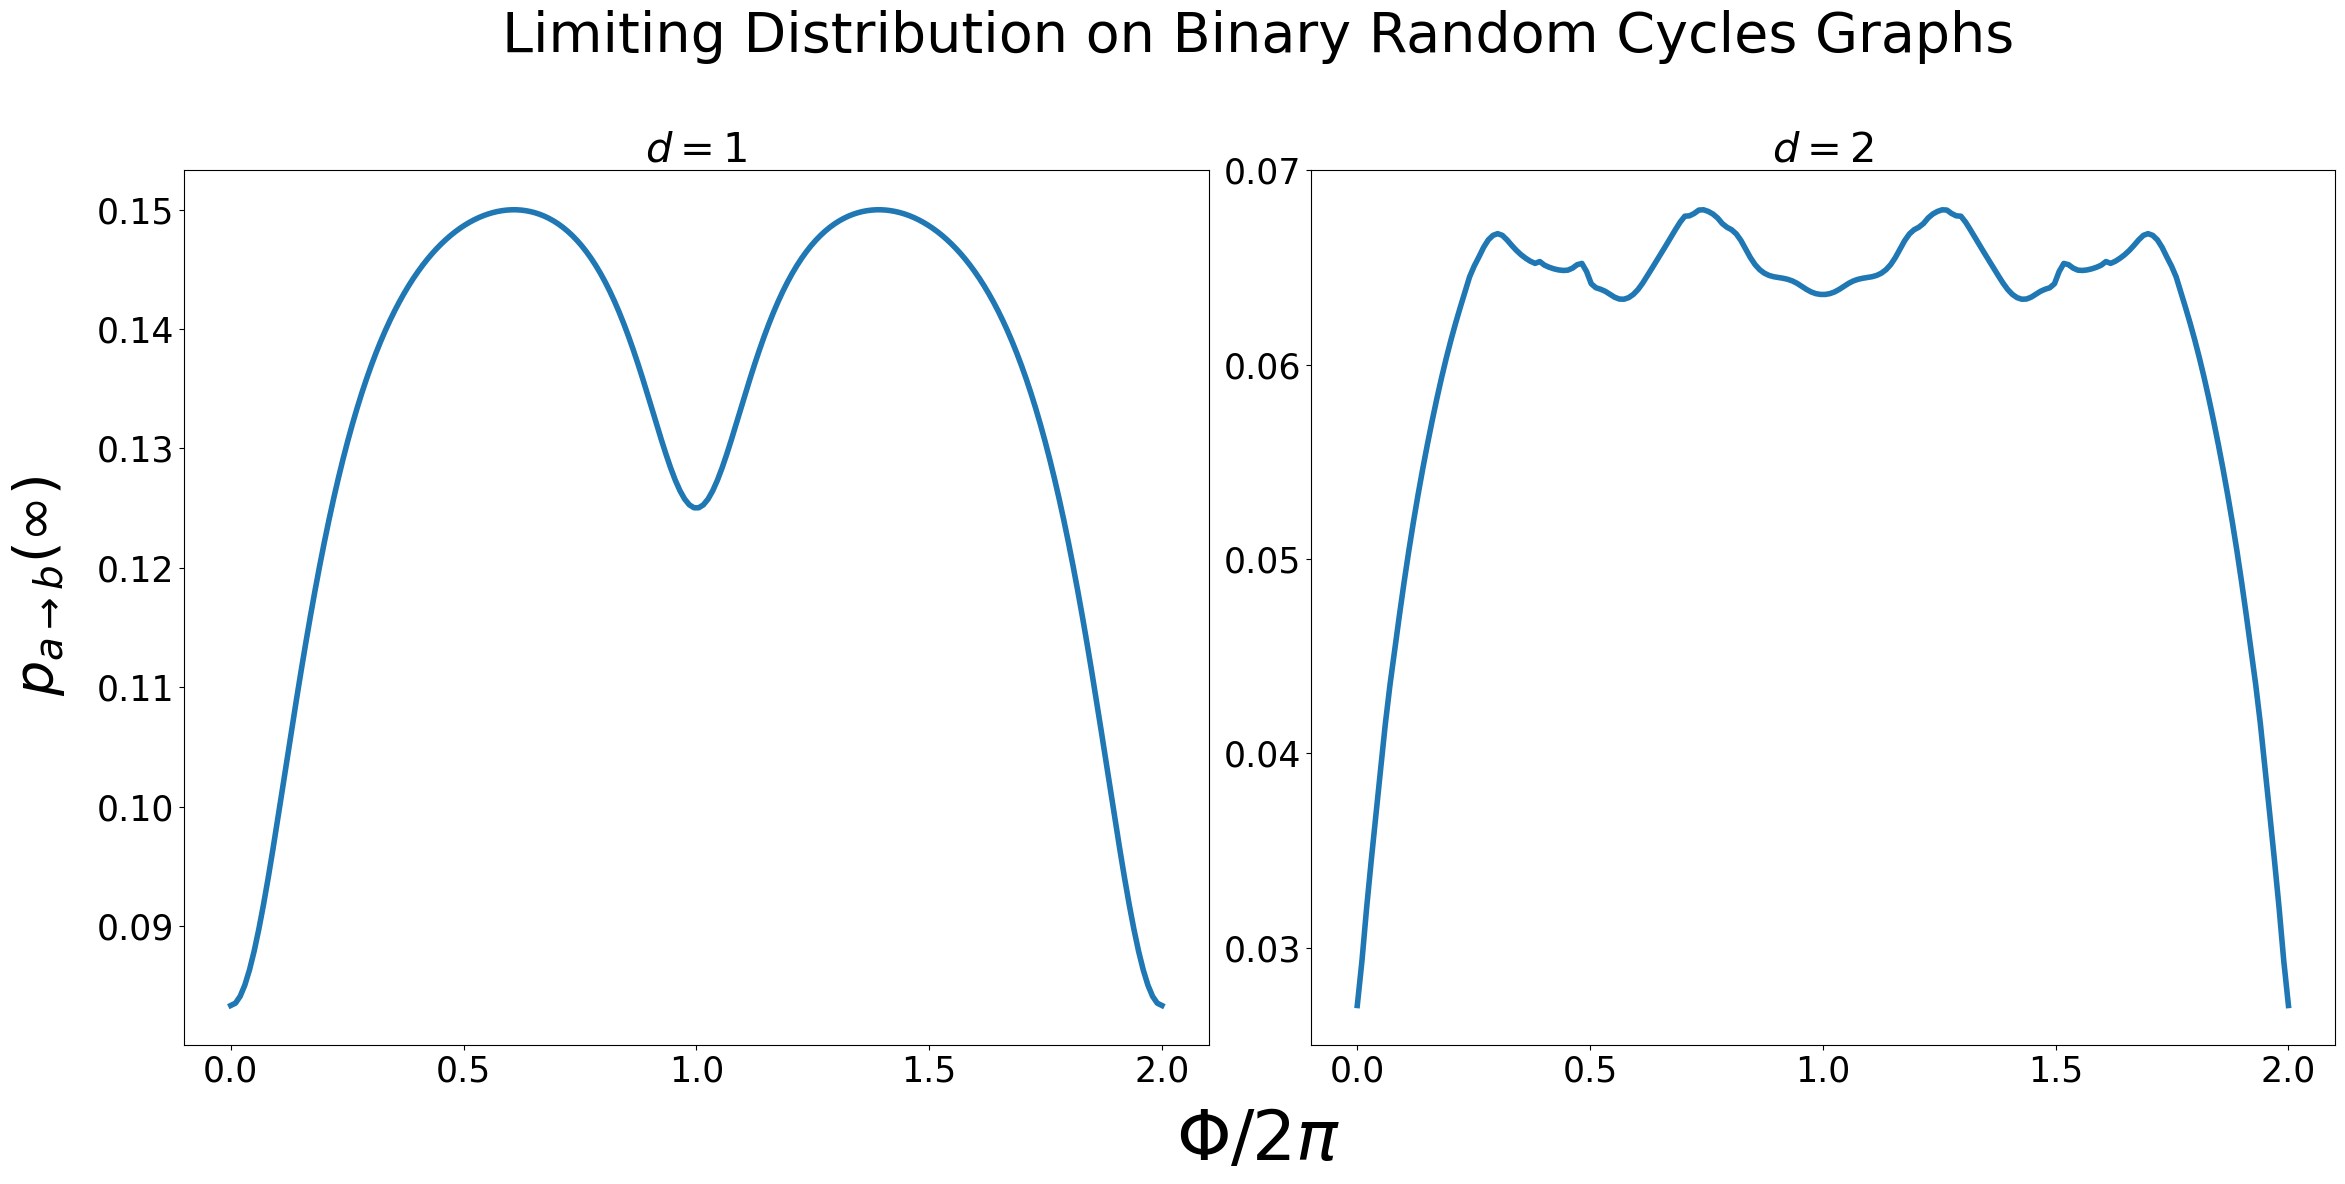

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(26, 12))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

for i in range(1,3):
    data = np.load(f"limitresults/2_{i}_limit.npz",allow_pickle=True)
    flux_lim_dict = data["flux_limit_dict"].item()

    fluxes = list(flux_lim_dict.keys())
    lims = list(flux_lim_dict.values())

    ax = axes[i-1]
    ax.plot(fluxes,lims,lw=4)

    ax.tick_params(axis="both",which="both",labelsize=25)
    ax.set_title(r"$d = %d$" % i,fontsize=30)
    ax.set_xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5)
    )    #ax.set_ylim(0,.16)

fig.suptitle("Limiting Distribution on Binary Random Cycles Graphs", fontsize=40)
fig.supxlabel(r"$\Phi/2\pi$", fontsize=50)
fig.supylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)

plt.tight_layout(rect=[.02, 0, .92, 0.95])

plt.savefig("LimBin.pdf")


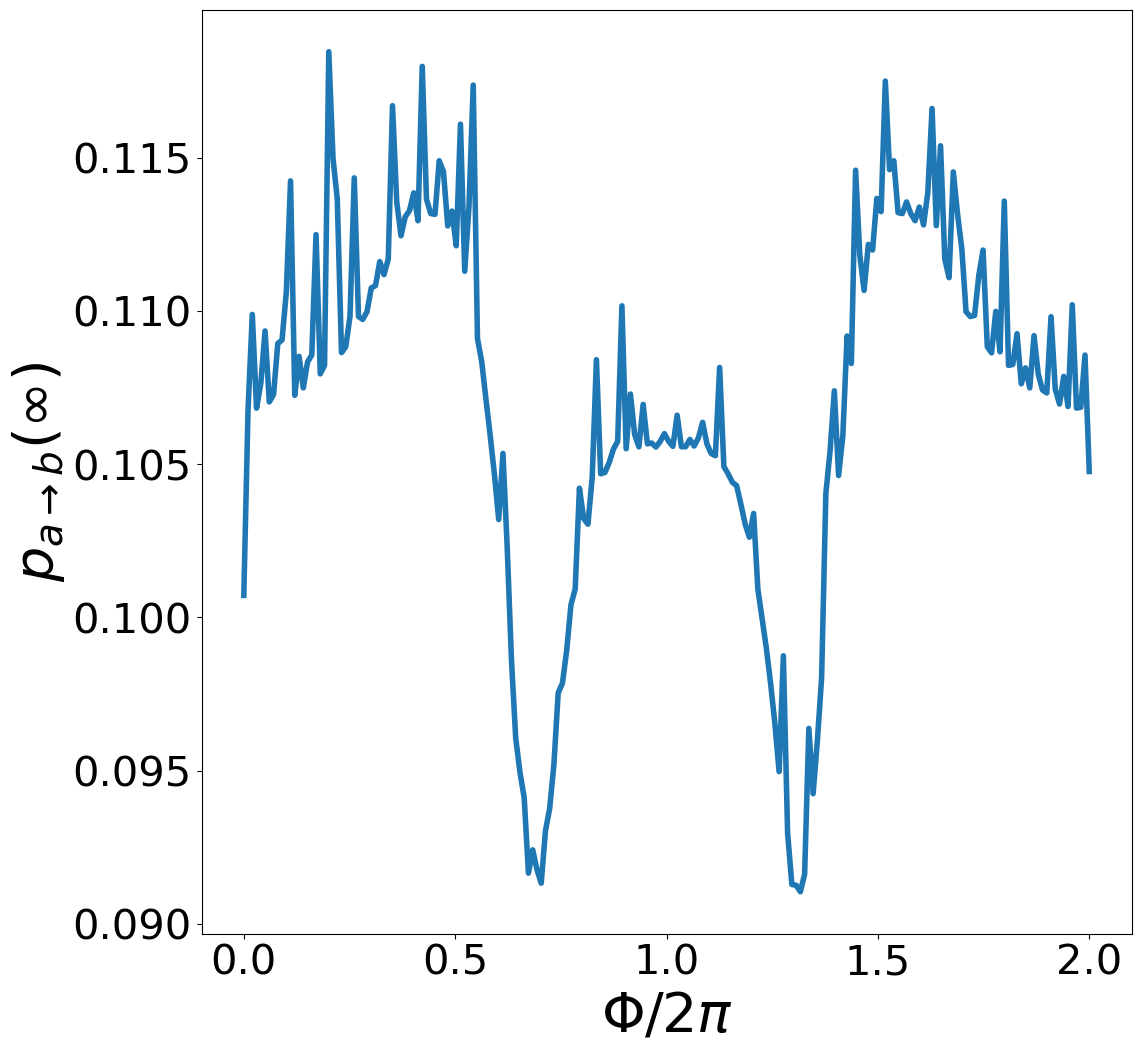

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes = [axes] # Flatten the 2D array for easy iteration

for i in range(1,2):
    data = np.load(f"limitresults/3_{i}_limit.npz",allow_pickle=True)
    flux_lim_dict = data["flux_limit_dict"].item()

    fluxes = list(flux_lim_dict.keys())
    lims = list(flux_lim_dict.values())

    ax = axes[i-1]
    ax.plot(fluxes,lims,lw=4)

    ax.tick_params(axis="both",which="both",labelsize=30)
    #ax.set_title(r"$d = %d$" % i,fontsize=20)
    ax.set_xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5)
    )    #ax.set_ylim(0,.16)
    ax.set_xlabel(r"$\Phi/2\pi$", fontsize=40)
    ax.set_ylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)


#fig.suptitle("Limiting Distribution on Ternary Random Cycles Graph", fontsize=40)
#fig.supxlabel(r"$\Phi/2\pi$", fontsize=30)
#fig.supylabel(r"$p_{a \rightarrow b}(\infty)$", fontsize=40)

#plt.tight_layout(rect=[.02, 0, .93, 0.95])
plt.savefig("LimTer.pdf",bbox_inches='tight')